In [ ]:
# Importar os pacotes básicos
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install gurobipy
from gurobipy import GRB
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 33.8 MB/s eta 0:00:00


In [ ]:
print(f'Yfinance version: {yf.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
# Versoes necessarias:
# pandas 2.2.2
# yfanence 0.2.40
# numpy 2.0.0
# python 3.12.4

Yfinance version: 0.2.40
Pandas version: 2.0.3
numpy version: 1.25.2


# **IMPORTAÇÃO E PRÉ-PROCESSAMENTO DE DADOS**

## **Importando dados e calculando retornos**

In [ ]:
# Importando as ações da IBOVESPA

lista_ibov = [
              ['ABEV3', 'AESB3', 'ALOS3', 'ALPA4', 'ALSO3', 'AMBP3', 'AMER3', 'ANIM3', 'ARZZ3', 'ASAI3', 'AURE3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BHIA3', 'BIDI11', 'BLAU3', 'BPAN4', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'CASH3', 'CBAV3', 'CCRO3', 'CIEL3', 'CLSA3', 'CMIG4', 'CMIN3', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CXSE3', 'CYRE3', 'DASA3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'ESPA3', 'EVEN3', 'EZTC3', 'FESA4', 'FLRY3', 'GGBR4', 'GMAT3', 'GNDI3', 'GOAU4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB3', 'ITUB4', 'JBSS3', 'JHSF3', 'KLBN11', 'LAME4', 'LAVV3', 'LCAM3', 'LJQQ3', 'LREN3', 'LWSA3', 'MATD3', 'MDIA3', 'MGLU3', 'MILS3', 'MRFG3', 'MRVE3', 'MULT3', 'MYPK3', 'NEOE3', 'NTCO3', 'ODPV3', 'ONCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'POSI3', 'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RAIZ4', 'RDOR3', 'RECV3', 'RENT3', 'RRRP3', 'SANB11', 'SAPR11', 'SBFG3', 'SBSP3', 'SEER3', 'SEQL3', 'SLCE3', 'SMTO3', 'SOMA3', 'SQIA3', 'SULA11', 'SUZB3', 'TAEE11', 'TEND3', 'TIMS3', 'TOTS3', 'TRPL4', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VBBR3', 'VIIA3', 'VIVA3', 'VIVT3', 'VLID3', 'WEGE3', 'YDUQ3'],
              ['ABEV3', 'ALPA4', 'AMER3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BIDI11', 'BIDI4', 'BPAN4', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4', 'HAPV3', 'HGTX3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'JHSF3', 'KLBN11', 'LAME4', 'LCAM3', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RDOR3', 'RENT3', 'SANB11', 'SBSP3', 'SULA11', 'SUZB3', 'TAEE11', 'TIMP3', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VIVT3', 'VIVT4', 'VVAR3', 'WEGE3', 'YDUQ3'], ['ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EQTL3', 'ESTC3', 'FIBR3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'KROT3', 'LAME4', 'LOGG3', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NATU3', 'NTCO3', 'PCAR4', 'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3', 'SMLS3', 'SULA11', 'SUZB3', 'TAEE11', 'TIMP3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT4', 'VVAR11', 'VVAR3', 'WEGE3', 'YDUQ3'],
              ['ABEV3', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'BVMF3', 'CCRO3', 'CIEL3', 'CMIG4', 'CPFE3', 'CPLE6', 'CSAN3', 'CSNA3', 'CTIP3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EQTL3', 'ESTC3', 'FIBR3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HYPE3', 'IGTA3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'KROT3', 'LAME4', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NATU3', 'PCAR4', 'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'RUMO3', 'SANB11', 'SAPR11', 'SBSP3', 'SMLE3', 'SMLS3', 'SUZB3', 'SUZB5', 'TAEE11', 'TIMP3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT4', 'VVAR11', 'WEGE3']
              ]

# Unificar todas as listas
tickers_IBOV = list(set().union(*lista_ibov))

# Ordenar a lista resultante e adicionar ".SA"
tickers_IBOV.sort()
tickers_IBOV = [ticker + '.SA' for ticker in tickers_IBOV]
tickers_IBOV.append('^BVSP')

dfibov = yf.download(tickers_IBOV, start = '2017-01-01', end = '2024-04-30')
dfibov = dfibov.stack().reset_index(level=1)
dfibov.columns.name = None
dfibov

[****************      34%%                      ]  53 of 155 completed

$RUMO3.SA: possibly delisted; No price data found  (1d 2017-01-01 -> 2024-04-30)


[**********************46%%                      ]  72 of 155 completed

$SMLE3.SA: possibly delisted; No price data found  (1d 2017-01-01 -> 2024-04-30)


[**********************70%%********              ]  109 of 155 completed

$SUZB5.SA: possibly delisted; No price data found  (1d 2017-01-01 -> 2024-04-30)


[**********************76%%**********            ]  118 of 155 completed

$BVMF3.SA: possibly delisted; No price data found  (1d 2017-01-01 -> 2024-04-30)


[**********************87%%****************      ]  135 of 155 completed

$CTIP3.SA: possibly delisted; No price data found  (1d 2017-01-01 -> 2024-04-30)


[*********************100%%**********************]  155 of 155 completed
ERROR:yfinance:
28 Failed downloads:
ERROR:yfinance:['SULA11.SA', 'LCAM3.SA', 'VIIA3.SA', 'ALSO3.SA', 'NATU3.SA', 'BRML3.SA', 'SMLS3.SA', 'ESTC3.SA', 'BRDT3.SA', 'BIDI4.SA', 'BTOW3.SA', 'IGTA3.SA', 'BIDI11.SA', 'HGTX3.SA', 'KROT3.SA', 'VVAR3.SA', 'SQIA3.SA', 'GNDI3.SA', 'LAME4.SA', 'ENBR3.SA', 'PCAR4.SA', 'VIVT4.SA', 'TIMP3.SA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
ERROR:yfinance:['RUMO3.SA', 'SMLE3.SA', 'SUZB5.SA', 'BVMF3.SA', 'CTIP3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2017-01-01 -> 2024-04-30)')


,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-01-02,ABEV3.SA,12.610021,16.309999,16.660000,16.260000,16.340000,4265400.0
2017-01-02,ALPA4.SA,7.343465,7.865927,8.033797,7.865927,8.001822,147363.0
2017-01-02,AMER3.SA,9.567108,9.759272,9.874087,9.625322,9.759272,204955.0
2017-01-02,ANIM3.SA,4.344816,4.416666,4.566666,4.416666,4.520000,70200.0
2017-01-02,ARZZ3.SA,21.125700,25.049999,25.059999,24.410000,25.059999,60200.0
...,...,...,...,...,...,...,...
2024-04-29,VIVT3.SA,47.590183,47.930000,48.700001,47.880001,47.980000,1634300.0
2024-04-29,VLID3.SA,17.883791,18.240000,18.320000,18.049999,18.129999,148700.0
2024-04-29,WEGE3.SA,39.301445,39.360001,39.470001,38.939999,39.220001,4677100.0


In [ ]:
dfibov.isnull().sum()

Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [ ]:
quantidadelinhas=dfibov.value_counts(['Ticker'])
print(quantidadelinhas['PETR4.SA'], quantidadelinhas['^BVSP'])

1823 1815


In [ ]:
# Calculando o retorno de todos os Tickers e juntando em um DataFrame

# Definindo a funcao de calculo de retornos
def calculo_retorno(x):
  retorno = (x/x.shift())-1
  return(retorno)

# Inicializacao de variaveis para o loop for
retornos = pd.DataFrame()
temp = []

# loop que cria um unico Data Frame com todos os retornos
for nome in dfibov['Ticker'].unique():

    # Esta primeira parte cria um dataframe temporario apenas com o ticker da iteracao atual do loop
    filtro = dfibov['Ticker'] == nome
    temp_lag = len(temp) # armazenando o numero de linhas do ticker anterior
    temp = dfibov[filtro]

    # Condicional pra remover tickers com menos linhas que os demais (dados faltantes)
    # e indexar corretamente o número de linhas em tickers com dados demais.
    if len(temp) < temp_lag:
      continue
    elif len(temp) > temp_lag:
      filtro2 = temp.index.isin(dfibov.query('Ticker == "^BVSP"').index)
      temp = temp[filtro2]

    # Esta segunda parte calcula o retorno acumulado do ticker atual e depois o anexa ao dataframe principal de retornos, test_retornos
    calculo = temp.groupby('Ticker').apply(lambda x: calculo_retorno(x['Close'])).T
    retornos = retornos.join(calculo, how = 'outer')

retornos.dropna(inplace=True) # excluindo linhas nulas
retornos

,ABEV3.SA,ALPA4.SA,AMER3.SA,ANIM3.SA,ARZZ3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,VLID3.SA,WEGE3.SA,YDUQ3.SA,^BVSP,AZUL4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-12,0.002838,0.000843,0.006780,-0.006116,-0.002512,-0.004180,-0.016453,-0.006620,-0.009966,-0.010101,...,0.002192,-0.001567,-0.045340,-0.043266,-0.001096,-0.000873,0.003563,0.022953,-0.007272,0.025000
2017-04-13,0.005093,-0.014322,0.010943,0.000000,0.010387,-0.028856,-0.052045,-0.027293,-0.030513,-0.011963,...,0.000000,0.000428,-0.023747,0.000000,-0.016452,-0.036697,-0.007692,-0.045482,-0.016684,0.001307
2017-04-17,0.016892,0.025641,0.023314,-0.003077,-0.004673,0.056186,0.046405,0.039152,0.044776,0.035969,...,-0.003594,0.018260,0.078378,0.000365,0.001115,0.004535,0.020871,0.060991,0.024019,-0.006090
2017-04-18,0.005537,-0.015000,0.053702,0.003086,-0.014085,0.007673,0.009681,0.000314,-0.005901,-0.003438,...,-0.018661,-0.007425,-0.007519,-0.029894,0.006683,0.002257,-0.011682,-0.005988,-0.002736,0.046389
2017-04-19,-0.003304,0.015228,0.028571,0.019231,0.019048,-0.019797,-0.036499,-0.015694,-0.009997,-0.018627,...,-0.008150,-0.009880,0.000000,0.002255,0.009682,0.015766,-0.008865,0.000000,-0.011721,0.000418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,-0.007531,0.015284,-0.018868,-0.011696,-0.014151,-0.015972,0.007667,0.002494,0.006627,-0.013358,...,-0.018225,-0.021796,-0.139073,-0.008685,-0.011475,-0.024775,-0.007316,0.006392,-0.003384,-0.018756
2024-04-24,0.015177,0.005376,0.019231,-0.005917,-0.000191,-0.013526,-0.003623,-0.002488,0.000000,-0.012308,...,-0.001614,-0.016135,-0.037363,0.012424,-0.007048,0.017898,0.006317,0.009174,-0.003252,-0.035211
2024-04-25,-0.001661,0.000000,0.037736,0.035714,-0.013017,-0.010055,-0.004364,-0.001662,-0.000732,-0.003427,...,0.018998,0.027333,-0.030822,-0.021082,-0.004384,0.009076,0.011509,0.057343,-0.000762,-0.038582


In [ ]:
# Extraindo os dados do BVSP do dataframe
retornos_BVSP = retornos['^BVSP']
retornos.drop(columns='^BVSP', inplace= True)
retornos_BVSP

Date
2017-04-12   -0.007272
2017-04-13   -0.016684
2017-04-17    0.024019
2017-04-18   -0.002736
2017-04-19   -0.011721
                ...   
2024-04-23   -0.003384
2024-04-24   -0.003252
2024-04-25   -0.000762
2024-04-26    0.015083
2024-04-29    0.006528
Name: ^BVSP, Length: 1746, dtype: float64

## **Separando dados p/ teste e treino**

In [ ]:
# Checando numero de linhas do dataframe de retornos dos ativos
len(retornos)

# Separando dados entre teste e treino
retornos_treino = retornos.head(round(len(retornos)*0.85))
retornos_teste = retornos.tail(len(retornos) - len(retornos_treino))

In [ ]:
# Teste e treino BVSP
retornos_BVSP_treino = retornos_BVSP.head(len(retornos_treino))
retornos_BVSP_teste = retornos_BVSP.tail(len(retornos_teste))
retornos_BVSP_treino

Date
2017-04-12   -0.007272
2017-04-13   -0.016684
2017-04-17    0.024019
2017-04-18   -0.002736
2017-04-19   -0.011721
                ...   
2023-04-03   -0.003691
2023-04-04    0.003576
2023-04-05   -0.008747
2023-04-06   -0.001545
2023-04-10    0.010166
Name: ^BVSP, Length: 1484, dtype: float64

# **INDEX TRACKING**

## **Definindo a função**

In [ ]:
# Função de otimização do portfólio
def otimizacao(x_in, y_in, K, lista, time_limit=300):
    import gurobipy as gp
    from gurobipy import GRB
    import pandas as pd
    import numpy as np

    T, N = x_in.shape

    # Criação do modelo
    model = gp.Model("portfolio_optimization")
    model.setParam(gp.GRB.Param.OutputFlag, 0) # suprimir a output usual do gurobi
    model.setParam('Seed', 0) # seed que garante reprodutibilidade de resultados
    model.Params.TimeLimit = time_limit # limite de tempo
    model.Params.MIPGap = 0.001 # precisão do gurobi

    # Variáveis de decisão
    w = model.addVars(N, lb=0.0, ub=1.0, vtype=GRB.CONTINUOUS, name="w")  # Pesos
    z = model.addVars(N, vtype=GRB.BINARY, name="z")  # Seleção

    # Função objetivo
    obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))
    model.setObjective(obj_expr, GRB.MINIMIZE)

    # Restrições
    model.addConstr(gp.quicksum(w[i] for i in range(N)) == 1, name="soma dos pesos")
    model.addConstr(gp.quicksum(z[i] for i in range(N)) == K, name="binario de selecao")

    # Vinculando variáveis w e z
    M = 1  # Valor grande o suficiente para garantir a restrição correta
    for i in range(N):
        model.addConstr(w[i] <= M * z[i], name=f"vinculo1_{i}")
        model.addConstr(w[i] >= z[i] * 1e-6, name=f"vinculo2_{i}")

    # Rodar otimização
    model.optimize()

    if model.status == GRB.OPTIMAL or model.status == GRB.TIME_LIMIT:
        pesos_dos_ativos = {lista[i]: w[i].X for i in range(N)}
        indices_ativos_selecionados = [i for i in range(N) if z[i].X > 0.5]
        return pesos_dos_ativos #, [lista[i] for i in selected_assets] # lista dos ativos escolhidos (usada para fins de depuração)
    else:
        raise RuntimeError("Solução não encontrada :(")

## **Aplicando o modelo**

**BVSP**

In [ ]:
# Calculando retornos acumulados do BVSP
retornos_BVSP_teste = pd.DataFrame(retornos_BVSP_teste) # TRansformando em DataFrame para aplicar a funcao

# Retornos acumulados começando com 1
acumulados = pd.DataFrame()
valor_inicial = 1
acumulados['BVSP'] = retornos_BVSP_teste.apply(lambda x: valor_inicial * (1+x).cumprod())
acumulados

,BVSP
Date,
2023-04-11,1.042878
2023-04-12,1.049515
2023-04-13,1.045274
2023-04-14,1.043516
2023-04-17,1.040934
...,...
2024-04-23,1.228784
2024-04-24,1.224788
2024-04-25,1.223855


**K = [10, 15, 20]**

In [ ]:
# Inicializacao de variaveis
lista = retornos_treino.columns.unique() # lista a ser usada na otimizacao
x_in = np.array(retornos_treino[lista])
y_in = np.array(retornos_BVSP_treino)

for K in [10, 15, 20]:
    # aplicando o modelo para K
    tickers = otimizacao(x_in=x_in, y_in=y_in, K=K, lista=lista)

    # Listando os indices escolhidos e seus pesos
    portfolio = pd.Series(tickers)
    filtro = portfolio != 0
    portfolio = portfolio[filtro]
    print(f'Ativos selecionados(K = {K}): \n', portfolio, '\n')

    # Retornos do portfolio escolhido
    retornos_portfolio = pd.DataFrame()
    retornos_portfolio['Portfolio'] = (retornos_teste[portfolio[portfolio != 0].index] * portfolio).sum(axis=1)


    # Calculando retornos acumulados do portfolio
    # Retornos acumulados começando com 1
    valor_inicial = 1
    acumulados[f'K = {K}'] = retornos_portfolio.apply(lambda x: valor_inicial * (1+x).cumprod())

acumulados

Ativos selecionados(K = 10): 
 ABEV3.SA     0.090625
B3SA3.SA     0.098376
BBDC4.SA     0.126719
EGIE3.SA     0.097905
ITSA4.SA     0.128547
KLBN11.SA    0.069342
MGLU3.SA     0.046656
PETR4.SA     0.120140
RENT3.SA     0.078414
VALE3.SA     0.143275
dtype: float64 

Ativos selecionados(K = 15): 
 ABEV3.SA     0.075694
B3SA3.SA     0.073006
BBAS3.SA     0.063200
BBDC3.SA     0.086788
CSAN3.SA     0.045455
EQTL3.SA     0.064442
ITUB4.SA     0.096485
JBSS3.SA     0.031453
KLBN11.SA    0.056831
LREN3.SA     0.056958
MGLU3.SA     0.029124
PETR4.SA     0.098086
RENT3.SA     0.043114
VALE3.SA     0.139581
WEGE3.SA     0.039784
dtype: float64 

Ativos selecionados(K = 20): 
 ABEV3.SA     0.063679
B3SA3.SA     0.064223
BBAS3.SA     0.052732
BBDC4.SA     0.085399
COGN3.SA     0.023467
CSAN3.SA     0.036509
ELET6.SA     0.021330
EQTL3.SA     0.045527
GGBR4.SA     0.031736
ITUB4.SA     0.086580
JBSS3.SA     0.029596
KLBN11.SA    0.048885
LREN3.SA     0.039758
MGLU3.SA     0.025535
PETR4.SA     0.

,BVSP,K = 10,K = 15,K = 20
Date,,,,
2023-04-11,1.042878,1.047912,1.046248,1.046374
2023-04-12,1.049515,1.053747,1.056548,1.055150
2023-04-13,1.045274,1.051670,1.051890,1.050242
2023-04-14,1.043516,1.052654,1.050995,1.050302
2023-04-17,1.040934,1.053112,1.054004,1.052715
...,...,...,...,...
2024-04-23,1.228784,1.062397,1.099462,1.110059
2024-04-24,1.224788,1.060435,1.098036,1.107793
2024-04-25,1.223855,1.053115,1.090090,1.103571


In [ ]:
# limpando memoria
import gc
gc.collect()

39

# **RESULTADOS**

**RMSE (RAÍZ DO ERRO QUADRADO MEDIO)**

In [ ]:
# Definindo funcao rmse (root-mean-squared-error)
def rmse(x,y):
    root_mean_square_error = np.sqrt((((x-y)**2).mean()))
    return(root_mean_square_error)

# inicializando listas para o loop
RMSE_list = []
pfolio_list = []

for pfolio in acumulados.columns:
    if pfolio != 'BVSP': # ignorando os valores de BVSP
        RMSE_list.append(rmse(acumulados[pfolio], acumulados['BVSP']))
        pfolio_list.append(pfolio)

# transformando resultados em um dicionario e listando-os
pfolio_RMSE = {pfolio_list[i]: RMSE_list[i] for i in range(len(pfolio_list))}
pd.Series(pfolio_RMSE)

K = 10    0.093848
K = 15    0.074011
K = 20    0.063847
dtype: float64

**PLOT DE RESULTADOS**

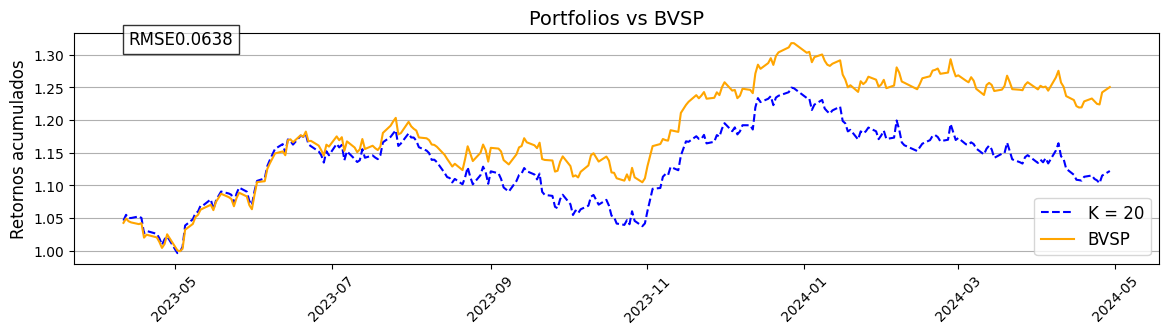

In [ ]:
# Inicializacao de plot
plt.figure(figsize=(14, 3))  # Optional: Adjust plot size
plt.plot(acumulados['K = 20'], label='K = 20', linestyle='--', color='blue')
plt.plot(acumulados['BVSP'], label='BVSP', linestyle='-', color='orange')# Checando numero de linhas do dataframe de retornos dos ativos
len(retornos)

plt.ylabel('Retornos acumulados', fontsize=12)
plt.title('Portfolios vs BVSP', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(axis='y')
plt.xticks(rotation=45)

# Mostrando raiz do erro quadrado medio
plt.text(0.05, 0.95, 'RMSE{:.4f}'.format(pfolio_RMSE['K = 20']), transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))


plt.show()

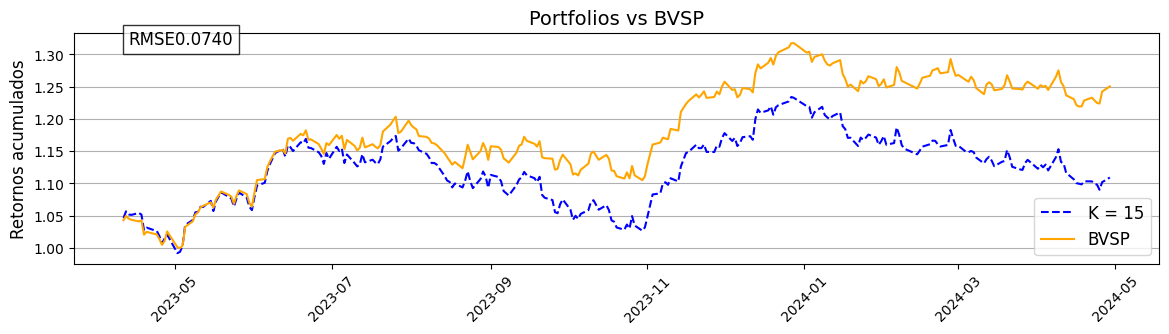

In [ ]:
# Inicializacao de plot
plt.figure(figsize=(14, 3))  # Optional: Adjust plot size
plt.plot(acumulados['K = 15'], label='K = 15', linestyle='--', color='blue')
plt.plot(acumulados['BVSP'], label='BVSP', linestyle='-', color='orange')# Checando numero de linhas do dataframe de retornos dos ativos
len(retornos)

plt.ylabel('Retornos acumulados', fontsize=12)
plt.title('Portfolios vs BVSP', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(axis='y')
plt.xticks(rotation=45)

# Mostrando raiz do erro quadrado medio
plt.text(0.05, 0.95, 'RMSE{:.4f}'.format(pfolio_RMSE['K = 15']), transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))


plt.show()

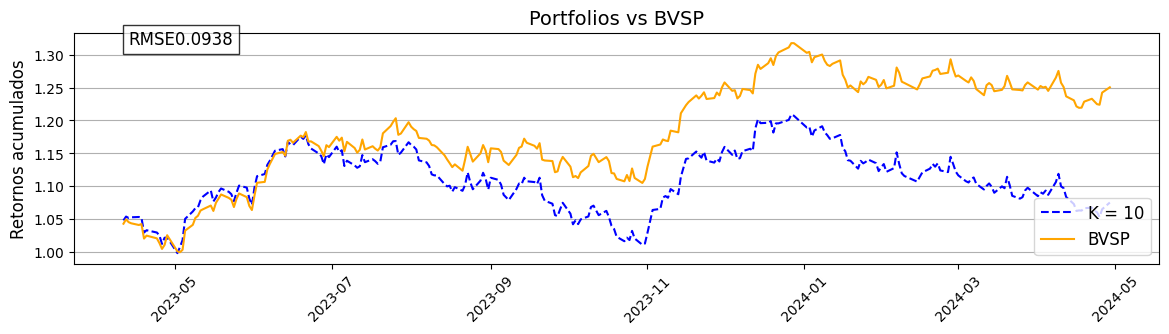

In [ ]:
# Inicializacao de plot
plt.figure(figsize=(14, 3))  # Optional: Adjust plot size
plt.plot(acumulados['K = 10'], label='K = 10', linestyle='--', color='blue')
plt.plot(acumulados['BVSP'], label='BVSP', linestyle='-', color='orange')# Checando numero de linhas do dataframe de retornos dos ativos
len(retornos)

plt.ylabel('Retornos acumulados', fontsize=12)
plt.title('Portfolios vs BVSP', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(axis='y')
plt.xticks(rotation=45)


# Mostrando raiz do erro quadrado medio
plt.text(0.05, 0.95, 'RMSE{:.4f}'.format(pfolio_RMSE['K = 10']), transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))


plt.show()

In [ ]:
# salvando resultados para poder limpar memoria
acumulados.to_csv('acumulados.csv')
retornos.to_csv('retornos.csv')
retornos_BVSP.to_csv('retornos_BVSP.csv')

In [ ]:
print('Favor, reiniciar kernel para economia de memoria')

Favor, reiniciar kernel para economia de memoria


# **TESTE COM ROLLING WINDOW**

In [ ]:
# importando dataframes, bibliotecas e funcao objetivo apos limpar memoria

# Importar os pacotes básicos
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import GRB
%matplotlib inline

# importando dataframes
acumulados = pd.read_csv('acumulados.csv', index_col='Date')
retornos = pd.read_csv('retornos.csv', index_col='Date')
retornos_BVSP = pd.read_csv('retornos_BVSP.csv', index_col='Date')

# calculo de retorno e RMSE
def calculo_retorno(x):
    retorno = (x/x.shift())-1
    return(retorno)

def rmse(x,y):
    root_mean_square_error = np.sqrt((((x-y)**2).mean()))
    return(root_mean_square_error)

# Função de otimização do portfólio
def otimizacao(x_in, y_in, K, lista, time_limit=300):
    import gurobipy as gp
    from gurobipy import GRB
    import pandas as pd
    import numpy as np

    T, N = x_in.shape

    # Criação do modelo
    model = gp.Model("portfolio_optimization")
    model.setParam(gp.GRB.Param.OutputFlag, 0) # suprimir a output usual do gurobi
    model.setParam('Seed', 0) # seed que garante reprodutibilidade de resultados
    model.Params.TimeLimit = time_limit # limite de tempo
    model.Params.MIPGap = 0.001 # precisão do gurobi

    # Variáveis de decisão
    w = model.addVars(N, lb=0.0, ub=1.0, vtype=GRB.CONTINUOUS, name="w")  # Pesos
    z = model.addVars(N, vtype=GRB.BINARY, name="z")  # Seleção

    # Função objetivo
    obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))
    model.setObjective(obj_expr, GRB.MINIMIZE)

    # Restrições
    model.addConstr(gp.quicksum(w[i] for i in range(N)) == 1, name="soma dos pesos")
    model.addConstr(gp.quicksum(z[i] for i in range(N)) == K, name="binario de selecao")

    # Vinculando variáveis w e z
    M = 1  # Valor grande o suficiente para garantir a restrição correta
    for i in range(N):
        model.addConstr(w[i] <= M * z[i], name=f"vinculo1_{i}")
        model.addConstr(w[i] >= z[i] * 1e-6, name=f"vinculo2_{i}")

    # Rodar otimização
    model.optimize()

    if model.status == GRB.OPTIMAL or model.status == GRB.TIME_LIMIT:
        pesos_dos_ativos = {lista[i]: w[i].X for i in range(N)}
        indices_ativos_selecionados = [i for i in range(N) if z[i].X > 0.5]
        return pesos_dos_ativos #, [lista[i] for i in selected_assets] # lista dos ativos escolhidos (usada para fins de depuração)
    else:
        raise RuntimeError("Solução não encontrada :(")

## **ROLLING WINDOW**

In [ ]:
# Inicializacao de variaveis para loop com rebalanceamento
tamanho_janela = round(len(retornos)*0.85)
lista = retornos.columns.unique()
acumulados_rw = pd.DataFrame()

# Index tracking com Rolling Window (Rebalanceamento de carteira)
for  K in [10, 15, 20]: # Iterando em K ativos maximos

        retornos_rw = pd.DataFrame() # zerando o dataframe entre iteracoes de K

        for i in range(0, len(retornos) - tamanho_janela + 1, 90): # Iterando em janelas que pulam i dias
                # Janela de treino atual
                x_in = np.array(retornos[i : i + tamanho_janela])
                y_in = np.array(retornos_BVSP[i : i + tamanho_janela])

                # Janela de teste atual
                x_out = retornos[i + tamanho_janela : min(i + tamanho_janela + 90, len(retornos))]

                # Listando os indices escolhidos e seus pesos para janela treino atual
                tickers = otimizacao(x_in=x_in, y_in=y_in, K=K, lista=lista)
                portfolio = pd.Series(tickers)
                filtro = portfolio != 0
                portfolio = portfolio[filtro]
                print(f'(K = {K})\nPortfolio nos dias {i} a {i+90}:\n', portfolio)

                # Calculando retornos para janela teste atual e anexando aos retornos totais
                retornos_temp = pd.DataFrame()
                retornos_temp['Portfolio'] = (x_out[portfolio[portfolio != 0].index] * portfolio).sum(axis=1)
                retornos_rw = pd.concat([retornos_rw, retornos_temp])

        # Calculando retornos totais do portfolio K com rebalanceamento
        # Retornos acumulados começando com 1
        valor_inicial = 1
        acumulados_rw[f'K = {K}'] = retornos_rw.apply(lambda x: valor_inicial * (1+x).cumprod())



<ipython-input-22-362434de9023>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))


(K = 10)
Portfolio nos dias 0 a 90:
 ABEV3.SA     0.090625
B3SA3.SA     0.098376
BBDC4.SA     0.126719
EGIE3.SA     0.097905
ITSA4.SA     0.128547
KLBN11.SA    0.069342
MGLU3.SA     0.046656
PETR4.SA     0.120140
RENT3.SA     0.078414
VALE3.SA     0.143275
dtype: float64


<ipython-input-22-362434de9023>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))


(K = 10)
Portfolio nos dias 90 a 180:
 ABEV3.SA     0.088485
B3SA3.SA     0.097437
BBDC4.SA     0.112627
EGIE3.SA     0.099530
ITSA4.SA     0.139173
KLBN11.SA    0.071279
MGLU3.SA     0.047401
PETR3.SA     0.120105
RENT3.SA     0.080949
VALE3.SA     0.143016
dtype: float64


<ipython-input-22-362434de9023>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))


(K = 10)
Portfolio nos dias 180 a 270:
 ABEV3.SA     0.094183
B3SA3.SA     0.090791
BBDC3.SA     0.117352
EQTL3.SA     0.094359
ITSA4.SA     0.142075
KLBN11.SA    0.075433
MGLU3.SA     0.042549
PETR3.SA     0.121188
RENT3.SA     0.075252
VALE3.SA     0.146819
dtype: float64


<ipython-input-22-362434de9023>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))


(K = 15)
Portfolio nos dias 0 a 90:
 ABEV3.SA     0.075694
B3SA3.SA     0.073006
BBAS3.SA     0.063200
BBDC3.SA     0.086788
CSAN3.SA     0.045455
EQTL3.SA     0.064442
ITUB4.SA     0.096485
JBSS3.SA     0.031453
KLBN11.SA    0.056831
LREN3.SA     0.056958
MGLU3.SA     0.029124
PETR4.SA     0.098086
RENT3.SA     0.043114
VALE3.SA     0.139581
WEGE3.SA     0.039784
dtype: float64


<ipython-input-22-362434de9023>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))


(K = 15)
Portfolio nos dias 90 a 180:
 ABEV3.SA     0.072437
B3SA3.SA     0.069717
BBAS3.SA     0.061727
BBDC4.SA     0.083701
COGN3.SA     0.028827
EQTL3.SA     0.065622
ITSA4.SA     0.114042
JBSS3.SA     0.035655
KLBN11.SA    0.056669
LREN3.SA     0.041802
MGLU3.SA     0.031218
PETR3.SA     0.102149
RENT3.SA     0.046665
VALE3.SA     0.142424
WEGE3.SA     0.047344
dtype: float64


<ipython-input-22-362434de9023>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))


(K = 15)
Portfolio nos dias 180 a 270:
 ABEV3.SA     0.072613
B3SA3.SA     0.069795
BBAS3.SA     0.061299
BBDC3.SA     0.085722
CSAN3.SA     0.047129
EQTL3.SA     0.070020
ITUB4.SA     0.094373
JBSS3.SA     0.037146
KLBN11.SA    0.055066
LREN3.SA     0.049332
MGLU3.SA     0.028318
PETR4.SA     0.099462
RENT3.SA     0.046265
VALE3.SA     0.141834
WEGE3.SA     0.041627
dtype: float64


<ipython-input-22-362434de9023>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))


(K = 20)
Portfolio nos dias 0 a 90:
 ABEV3.SA     0.060073
B3SA3.SA     0.062784
BBAS3.SA     0.056835
BBDC4.SA     0.085973
BBSE3.SA     0.036529
COGN3.SA     0.023031
CSAN3.SA     0.032438
CSNA3.SA     0.027078
EQTL3.SA     0.046155
ITSA4.SA     0.090035
JBSS3.SA     0.027519
KLBN11.SA    0.046550
LREN3.SA     0.042021
MGLU3.SA     0.025805
PETR3.SA     0.097643
RENT3.SA     0.035320
TIMS3.SA     0.030717
TOTS3.SA     0.024463
VALE3.SA     0.116027
WEGE3.SA     0.033002
dtype: float64


<ipython-input-22-362434de9023>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))


(K = 20)
Portfolio nos dias 90 a 180:
 ABEV3.SA     0.059884
B3SA3.SA     0.062260
BBAS3.SA     0.046735
BBDC4.SA     0.083944
BBSE3.SA     0.036565
COGN3.SA     0.023071
CSAN3.SA     0.034504
CSNA3.SA     0.024343
ELET6.SA     0.020205
EQTL3.SA     0.045657
ITSA4.SA     0.089686
JBSS3.SA     0.031753
KLBN11.SA    0.048363
LREN3.SA     0.038034
MGLU3.SA     0.028328
PETR3.SA     0.095428
RENT3.SA     0.040945
TIMS3.SA     0.032697
VALE3.SA     0.120292
WEGE3.SA     0.037305
dtype: float64


<ipython-input-22-362434de9023>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj_expr = gp.quicksum((gp.quicksum(x_in[t, i] * w[i] for i in range(N)) - y_in[t]) ** 2 for t in range(T))


(K = 20)
Portfolio nos dias 180 a 270:
 ABEV3.SA     0.057593
B3SA3.SA     0.060478
BBAS3.SA     0.045766
BBDC4.SA     0.079308
BBSE3.SA     0.037178
COGN3.SA     0.022168
CSAN3.SA     0.036249
ELET3.SA     0.018561
EQTL3.SA     0.046426
ITSA4.SA     0.091038
JBSS3.SA     0.032370
KLBN11.SA    0.045923
LREN3.SA     0.036177
MGLU3.SA     0.026235
PETR3.SA     0.097436
RENT3.SA     0.040849
TIMS3.SA     0.033670
USIM5.SA     0.026179
VALE3.SA     0.126091
WEGE3.SA     0.040305
dtype: float64


In [ ]:
# adicionando retornos do BVSP no periodo para efeito de comparacao
retornos_BVSP_rw = pd.DataFrame(retornos_BVSP.tail(len(acumulados_rw))) # TRansformando em DataFrame para aplicar a funcao

# Retornos acumulados começando com 1
valor_inicial = 1
acumulados_rw['BVSP'] = retornos_BVSP_rw.apply(lambda x: valor_inicial * (1+x).cumprod())
acumulados_rw

,K = 10,K = 15,K = 20,BVSP
Date,,,,
2023-04-11,1.047912,1.046248,1.045873,1.042878
2023-04-12,1.053747,1.056548,1.055432,1.049515
2023-04-13,1.051670,1.051890,1.049829,1.045274
2023-04-14,1.052654,1.050995,1.047589,1.043516
2023-04-17,1.053112,1.054004,1.049610,1.040934
...,...,...,...,...
2024-04-23,1.059722,1.088277,1.106539,1.228784
2024-04-24,1.057811,1.086834,1.104024,1.224788
2024-04-25,1.046983,1.078827,1.099220,1.223855


In [ ]:
# inicializando listas para o loop
RMSE_list = []
pfolio_list = []

for pfolio in acumulados_rw.columns:
    if pfolio != 'BVSP': # ignorando os valores de BVSP
        RMSE_list.append(rmse(acumulados_rw[pfolio], acumulados_rw['BVSP']))
        pfolio_list.append(pfolio)

# transformando resultados em um dicionario e listando-os
pfolio_RMSE_rw = {pfolio_list[i]: RMSE_list[i] for i in range(len(pfolio_list))}
pd.Series(pfolio_RMSE_rw)

K = 10    0.095285
K = 15    0.081627
K = 20    0.069834
dtype: float64

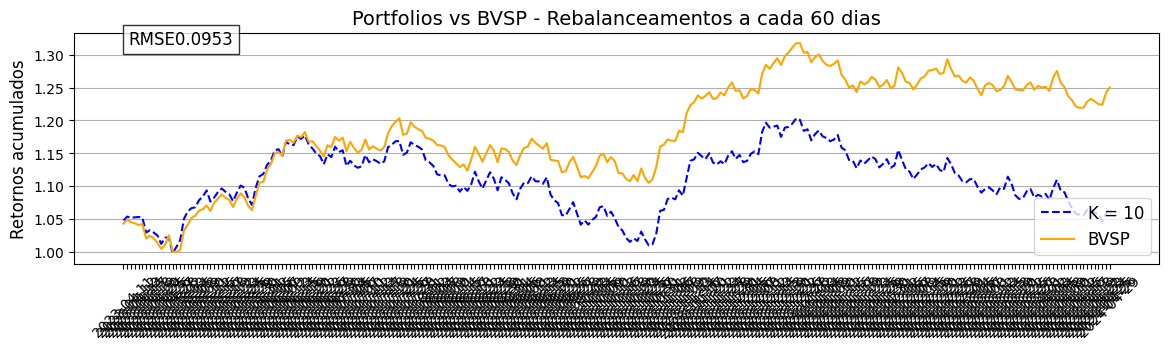

In [ ]:
# Inicializacao de plot
plt.figure(figsize=(14, 3))  # Optional: Adjust plot size
plt.plot(acumulados_rw['K = 10'], label='K = 10', linestyle='--', color='blue')
plt.plot(acumulados_rw['BVSP'], label='BVSP', linestyle='-', color='orange')# Checando numero de linhas do dataframe de retornos dos ativos
len(retornos)

plt.ylabel('Retornos acumulados', fontsize=12)
plt.title('Portfolios vs BVSP - Rebalanceamentos a cada 60 dias', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(axis='y')
plt.xticks(rotation=45)

# Mostrando raiz do erro quadrado medio
plt.text(0.05, 0.95, 'RMSE{:.4f}'.format(pfolio_RMSE_rw['K = 10']), transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))


plt.show()

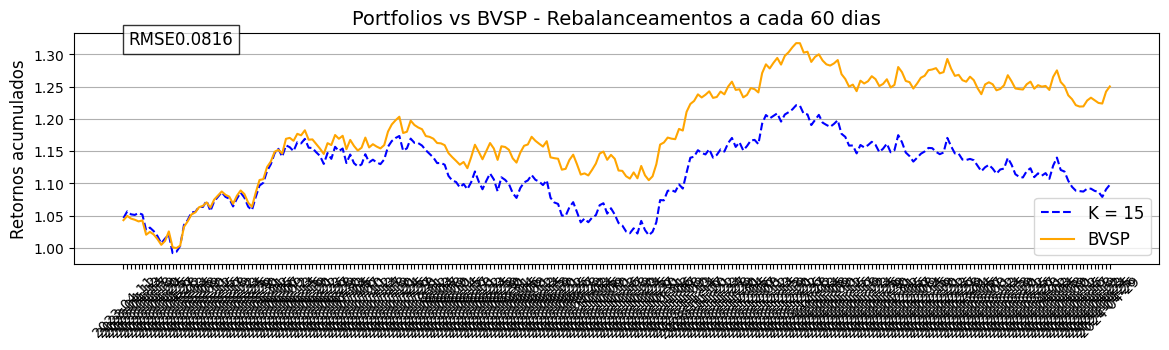

In [ ]:
# Inicializacao de plot
plt.figure(figsize=(14, 3))  # Optional: Adjust plot size
plt.plot(acumulados_rw['K = 15'], label='K = 15', linestyle='--', color='blue')
plt.plot(acumulados_rw['BVSP'], label='BVSP', linestyle='-', color='orange')# Checando numero de linhas do dataframe de retornos dos ativos
len(retornos)

plt.ylabel('Retornos acumulados', fontsize=12)
plt.title('Portfolios vs BVSP - Rebalanceamentos a cada 60 dias', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(axis='y')
plt.xticks(rotation=45)

# Mostrando raiz do erro quadrado medio
plt.text(0.05, 0.95, 'RMSE{:.4f}'.format(pfolio_RMSE_rw['K = 15']), transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))


plt.show()

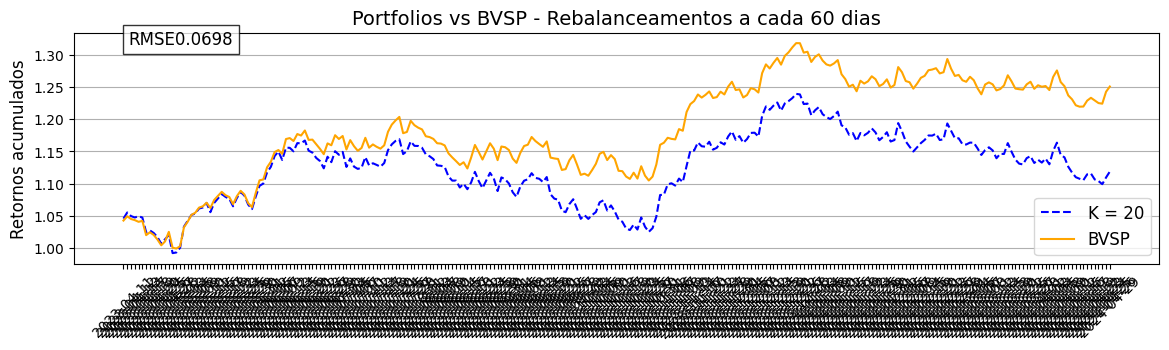

In [ ]:
# Inicializacao de plot
plt.figure(figsize=(14, 3))  # Optional: Adjust plot size
plt.plot(acumulados_rw['K = 20'], label='K = 20', linestyle='--', color='blue')
plt.plot(acumulados_rw['BVSP'], label='BVSP', linestyle='-', color='orange')# Checando numero de linhas do dataframe de retornos dos ativos
len(retornos)

plt.ylabel('Retornos acumulados', fontsize=12)
plt.title('Portfolios vs BVSP - Rebalanceamentos a cada 60 dias', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(axis='y')
plt.xticks(rotation=45)

# Mostrando raiz do erro quadrado medio
plt.text(0.05, 0.95, 'RMSE{:.4f}'.format(pfolio_RMSE_rw['K = 20']), transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))


plt.show()